# Assignment 2 (Logical AND Gate and Initial Parameters):

- Useful functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """returns the sigmoid function value for the input x.

    Args:
        x (numpy.ndarray): numpy array of real numbers

    Returns:
        numpy.ndarray: sigmoid function value for each element in x
    """
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    """returns the derivative of the sigmoid function for the input x.

    Args:
        x (numpy.ndarray): numpy array of real numbers

    Returns:
        numpy.ndarray: derivative of the sigmoid function for each element in x
    """
    sig = sigmoid(x)
    return sig * (1 - sig)

def update_sgd(weights, x, y, learning_rate):
    """Performs a single epoch of stochastic gradient descent.

    Args:
        weights (numpy.ndarray): current weights
        x (numpy.ndarray): input data
        y (numpy.ndarray): target values
        learning_rate (float): learning rate for the update

    Returns:
        numpy.ndarray: updated weights
    """
    new_weights = np.copy(weights) # Create a copy of weights to avoid modifying the original
    for k in range(len(x)):        # Iterate over each sample
        x_k = x[k]                 # Get the k-th input sample
        y_k = y[k]                 # Get the k-th target value
        z = np.dot(weights, x_k)   # Compute the linear combination
        error = y_k - sigmoid(z)   # Calculate the error
        gradient = dsigmoid(z) * error  # Compute the gradient
        new_weights += learning_rate * gradient * x_k  # Update the weights
    return new_weights

def update_batched_gd(weights, x, y, learning_rate):
    """Performs a single epoch of batched gradient descent.

    Args:
        weights (numpy.ndarray): current weights
        x (numpy.ndarray): input data
        y (numpy.ndarray): target values
        learning_rate (float): learning rate for the update

    Returns:
        numpy.ndarray: updated weights
    """
    z = np.dot(x, weights)            # Compute the linear combination for all samples
    errors = y - sigmoid(z)           # Calculate the errors for all samples
    gradients = dsigmoid(z) * errors  # Compute the gradients for all samples
    new_weights = weights + learning_rate * np.dot(x.T, gradients) / x.shape[0]  # Update the weights
    return new_weights

def train_sgd(weights, x, y, epochs, learning_rate):
    """Trains the model using stochastic gradient descent.

    Args:
        weights (numpy.ndarray): initial weights
        x (numpy.ndarray): input data
        y (numpy.ndarray): target values
        epochs (int): number of epochs to train
        learning_rate (float): learning rate for the update

    Returns:
        numpy.ndarray: final weights after training
        numpy.ndarray: error history
    """
    trained_weights = np.copy(weights)  # Create a copy of weights to avoid modifying the original
    error_history = np.zeros(epochs)    # Initialize error history
    for epoch in range(epochs):
        trained_weights = update_sgd(trained_weights, x, y, learning_rate)  # Update weights
        z = np.dot(x, trained_weights)  # Compute the linear combination
        error = y - sigmoid(z)          # Calculate the error
        error_history[epoch] = np.mean(error ** 2)  # Store the mean square error
        
    return trained_weights, error_history  # Return final weights and error history

def train_batched_gd(weights, x, y, epochs, learning_rate):
    """Trains the model using batched gradient descent.

    Args:
        weights (numpy.ndarray): initial weights
        x (numpy.ndarray): input data
        y (numpy.ndarray): target values
        epochs (int): number of epochs to train
        learning_rate (float): learning rate for the update

    Returns:
        numpy.ndarray: final weights after training
        numpy.ndarray: error history
    """
    trained_weights = np.copy(weights)  # Create a copy of weights to avoid modifying the original
    error_history = np.zeros(epochs)    # Initialize error history
    for epoch in range(epochs):
        trained_weights = update_batched_gd(trained_weights, x, y, learning_rate)  # Update weights
        z = np.dot(x, trained_weights)  # Compute the linear combination
        error = y - sigmoid(z)          # Calculate the error
        error_history[epoch] = np.mean(error ** 2)  # Store the mean square error
        
    return trained_weights, error_history  # Return final weights and error history

def inference(weights, x):
    """Performs inference using the trained weights.

    Args:
        weights (numpy.ndarray): trained weights
        x (numpy.ndarray): input data

    Returns:
        numpy.ndarray: predicted values
    """
    z = np.dot(x, weights)  # Compute the linear combination
    return sigmoid(z)       # Return the sigmoid activation of the linear combination

def plot_error_historys(error_history_sgd, error_history_gd):
    """Plots the error history of two training methods.

    Args:
        error_history_sgd (numpy.ndarray): error history for the first method
        error_history_gd (numpy.ndarray): error history for the second method
    """
    plt.plot(error_history_sgd, label='Stochastic Gradient Descent')
    plt.plot(error_history_gd, label='Batched Gradient Descent')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('Error History Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_surface(func, x_range, y_range, title='Surface plot of the function'):
    """Plots the surface of a function over a specified range.

    Args:
        func (Callable[[float, float], float]): function to plot f:R^2 -> R
        x_range (tuple): range for x-axis (min, max)
        y_range (tuple): range for y-axis (min, max)
        title (str): title of the plot
    """
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.vectorize(func)(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('function value')
    plt.title(title)
    plt.tight_layout()
    plt.show()

- Data for AND gate problem:

In [2]:
# gate inputs
# last column is bias term
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
Y = np.array([0, 0, 0, 1])  # AND gate

2-1) [10 pts] Run the given code without any modification.

Input: [0, 0], Target: 0, SGD Prediction: 1.0, GD Prediction: 1.0
Input: [0, 1], Target: 0, SGD Prediction: 1.0, GD Prediction: 1.0
Input: [1, 0], Target: 0, SGD Prediction: 1.0, GD Prediction: 1.0
Input: [1, 1], Target: 1, SGD Prediction: 1.0, GD Prediction: 1.0


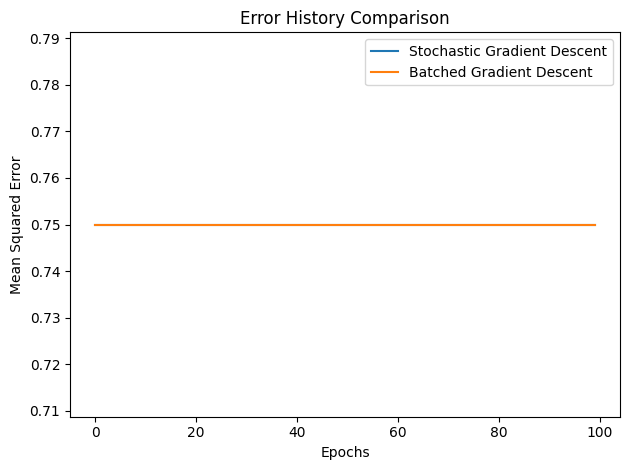

In [3]:
initial_weight = np.array([3332322.1, -323256.6, 772213.0])
epochs = 100
learning_rate = 0.01

trained_weights_sgd, error_history_sgd = train_sgd(initial_weight, X, Y, epochs, learning_rate)
trained_weights_gd, error_history_gd = train_batched_gd(initial_weight, X, Y, epochs, learning_rate)

# inference
for x, y in zip(X, Y):
    prediction_sgd = inference(trained_weights_sgd, x)
    prediction_gd = inference(trained_weights_gd, x)
    print(f"Input: [{x[0].item()}, {x[1].item()}], Target: {y.item()}, SGD Prediction: {prediction_sgd}, GD Prediction: {prediction_gd}")
    
# Plot error history
plot_error_historys(error_history_sgd, error_history_gd)

2-2) [10 pts] Modify the initial weight as `[0.68, 0.01, 0.73]` and run the code. 

Input: [0, 0], Target: 0, SGD Prediction: 0.5858789444357834, GD Prediction: 0.6529386771864374
Input: [0, 1], Target: 0, SGD Prediction: 0.5640276499603522, GD Prediction: 0.6487262423076962
Input: [1, 0], Target: 0, SGD Prediction: 0.71817883589881, GD Prediction: 0.7838095274094496
Input: [1, 1], Target: 1, SGD Prediction: 0.6997306376436374, GD Prediction: 0.7806519101045869


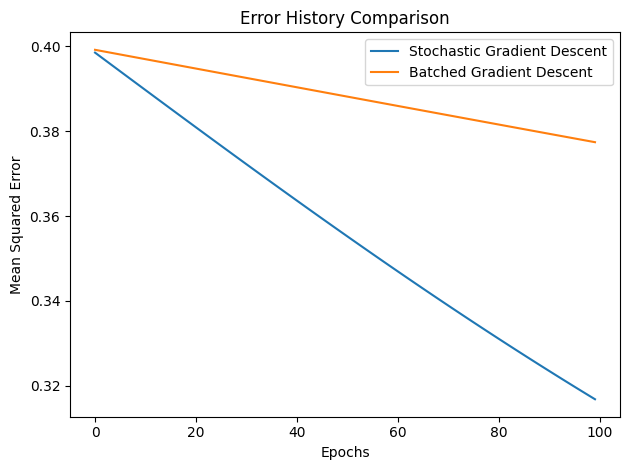

In [4]:
# copy and paste from 2-1 and modify
initial_weight = np.array([0.68, 0.01, 0.73])
epochs = 100
learning_rate = 0.01

trained_weights_sgd, error_history_sgd = train_sgd(initial_weight, X, Y, epochs, learning_rate)
trained_weights_gd, error_history_gd = train_batched_gd(initial_weight, X, Y, epochs, learning_rate)

# inference
for x, y in zip(X, Y):
    prediction_sgd = inference(trained_weights_sgd, x)
    prediction_gd = inference(trained_weights_gd, x)
    print(f"Input: [{x[0].item()}, {x[1].item()}], Target: {y.item()}, SGD Prediction: {prediction_sgd}, GD Prediction: {prediction_gd}")
    
# Plot error history
plot_error_historys(error_history_sgd, error_history_gd)

2-3) Modify the learning rate to `lr = 0.9` and run the code. Then, modify the
learning rate to `lr = 100.0` and run the code. use the initial weight of 2-2) again.

Input: [0, 0], Target: 0, SGD Prediction: 0.02076724184414953, GD Prediction: 0.14059208952268304
Input: [0, 1], Target: 0, SGD Prediction: 0.2022828027268927, GD Prediction: 0.30132424051117845
Input: [1, 0], Target: 0, SGD Prediction: 0.20269732627055545, GD Prediction: 0.3331285985441984
Input: [1, 1], Target: 1, SGD Prediction: 0.7524616677488581, GD Prediction: 0.5683966375444437


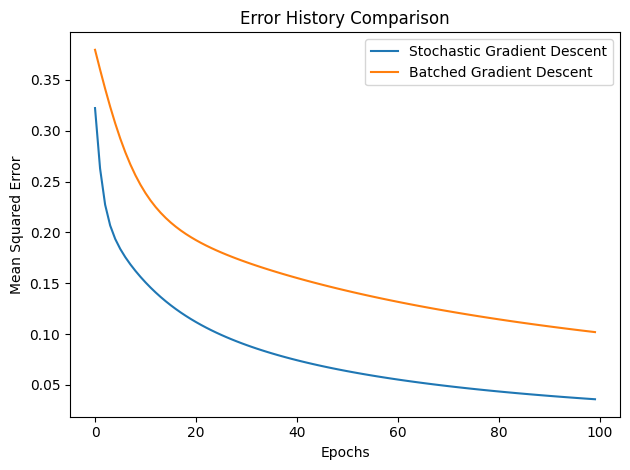

In [5]:
# lr = 0.9
initial_weight = np.array([0.68, 0.01, 0.73])

epochs = 100
learning_rate = 0.9

trained_weights_sgd, error_history_sgd = train_sgd(initial_weight, X, Y, epochs, learning_rate)
trained_weights_gd, error_history_gd = train_batched_gd(initial_weight, X, Y, epochs, learning_rate)

# inference
for x, y in zip(X, Y):
    prediction_sgd = inference(trained_weights_sgd, x)
    prediction_gd = inference(trained_weights_gd, x)
    print(f"Input: [{x[0].item()}, {x[1].item()}], Target: {y.item()}, SGD Prediction: {prediction_sgd}, GD Prediction: {prediction_gd}")
    
# Plot error history
plot_error_historys(error_history_sgd, error_history_gd)

Input: [0, 0], Target: 0, SGD Prediction: 1.888824230460175e-17, GD Prediction: 0.00011426961631617357
Input: [0, 1], Target: 0, SGD Prediction: 1.5015893403008796e-22, GD Prediction: 6.130495477215339e-06
Input: [1, 0], Target: 0, SGD Prediction: 2.460772863615446e-21, GD Prediction: 2.0386940052294234e-05
Input: [1, 1], Target: 1, SGD Prediction: 1.9562806540269723e-26, GD Prediction: 1.0936497678536148e-06


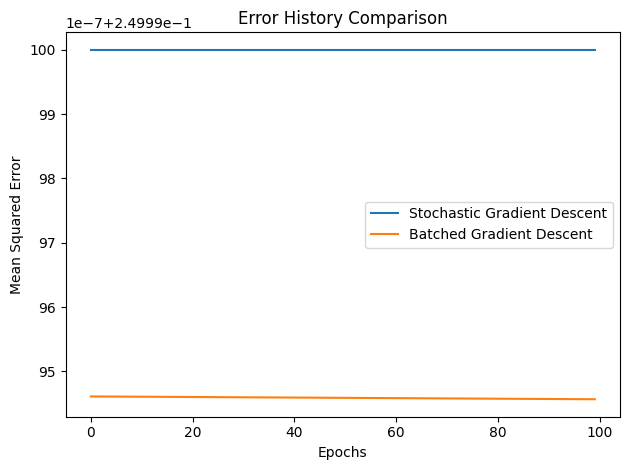

In [6]:
# lr = 100.0
initial_weight = np.array([0.68, 0.01, 0.73])
epochs = 100
learning_rate = 100.0

trained_weights_sgd, error_history_sgd = train_sgd(initial_weight, X, Y, epochs, learning_rate)
trained_weights_gd, error_history_gd = train_batched_gd(initial_weight, X, Y, epochs, learning_rate)

# inference
for x, y in zip(X, Y):
    prediction_sgd = inference(trained_weights_sgd, x)
    prediction_gd = inference(trained_weights_gd, x)
    print(f"Input: [{x[0].item()}, {x[1].item()}], Target: {y.item()}, SGD Prediction: {prediction_sgd}, GD Prediction: {prediction_gd}")
    
# Plot error history
plot_error_historys(error_history_sgd, error_history_gd)

2-4) Run the code after changing the epoch to `100000`.

Input: [0, 0], Target: 0, SGD Prediction: 1.888824230460175e-17, GD Prediction: 1.4446036204234527e-09
Input: [0, 1], Target: 0, SGD Prediction: 1.5015893403008796e-22, GD Prediction: 0.0010675490751009757
Input: [1, 0], Target: 0, SGD Prediction: 2.460772863615446e-21, GD Prediction: 0.0010675490750991117
Input: [1, 1], Target: 1, SGD Prediction: 1.9562806540269723e-26, GD Prediction: 0.9987367297531166


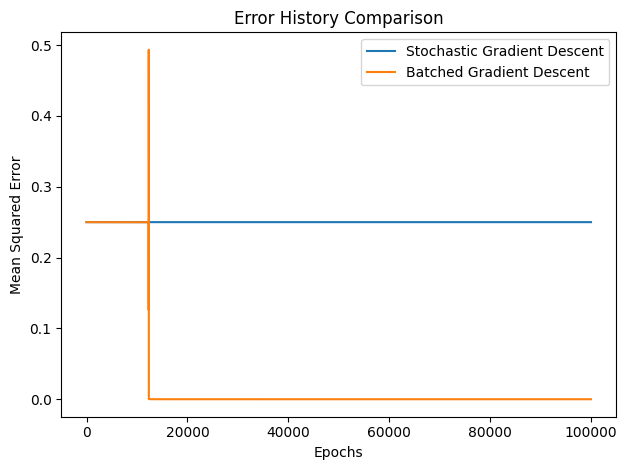

In [7]:
# lr = 100000.0
initial_weight = np.array([0.68, 0.01, 0.73])
epochs = 100000
learning_rate = 100.0

trained_weights_sgd, error_history_sgd = train_sgd(initial_weight, X, Y, epochs, learning_rate)
trained_weights_gd, error_history_gd = train_batched_gd(initial_weight, X, Y, epochs, learning_rate)

# inference
for x, y in zip(X, Y):
    prediction_sgd = inference(trained_weights_sgd, x)
    prediction_gd = inference(trained_weights_gd, x)
    print(f"Input: [{x[0].item()}, {x[1].item()}], Target: {y.item()}, SGD Prediction: {prediction_sgd}, GD Prediction: {prediction_gd}")
    
# Plot error history
plot_error_historys(error_history_sgd, error_history_gd)

2-5) Run the code using the parameters below. Now let’s compare batched gradient descent and stochastic gradient descent. Which one shows faster error convergence? Which one shows better minimized error?
```python
initial_weight = np.array([0.68, 0.01, 0.73])
epochs = 1000
learning_rate = 0.9
```

Input: [0, 0], Target: 0, SGD Prediction: 0.00029651992675384226, GD Prediction: 0.003836715602801314
Input: [0, 1], Target: 0, SGD Prediction: 0.05897359643587749, GD Prediction: 0.1273650044100738
Input: [1, 0], Target: 0, SGD Prediction: 0.05897359748230715, GD Prediction: 0.12736907448631166
Input: [1, 1], Target: 1, SGD Prediction: 0.9297814374445187, GD Prediction: 0.8468895093526762


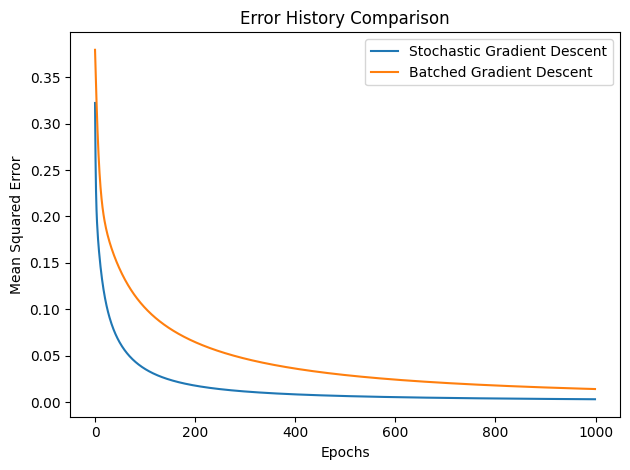

In [8]:
initial_weight = np.array([0.68, 0.01, 0.73])
epochs = 1000
learning_rate = 0.9

trained_weights_sgd, error_history_sgd = train_sgd(initial_weight, X, Y, epochs, learning_rate)
trained_weights_gd, error_history_gd = train_batched_gd(initial_weight, X, Y, epochs, learning_rate)

# inference
for x, y in zip(X, Y):
    prediction_sgd = inference(trained_weights_sgd, x)
    prediction_gd = inference(trained_weights_gd, x)
    print(f"Input: [{x[0].item()}, {x[1].item()}], Target: {y.item()}, SGD Prediction: {prediction_sgd}, GD Prediction: {prediction_gd}")
    
# Plot error history
plot_error_historys(error_history_sgd, error_history_gd)

2-6) Modify the given code and plot loss the with some fixed bias value, $w_3=0, -5, -20, -100, -500$. When changing $w_3$, it is recommended to modify the $x$, $y$ range to $(-5, 1.5 \times (-w_3))$ as shown in the code provided. What is the difference between our homework and typical optimization problem?

In [9]:
# trained weights
print("Trained weights (SGD):", trained_weights_sgd)
print("Trained weights (GD):", trained_weights_gd)

Trained weights (SGD): [ 5.35321822  5.3532182  -8.12309957]
Trained weights (GD): [ 3.63487076  3.63483415 -5.5592945 ]


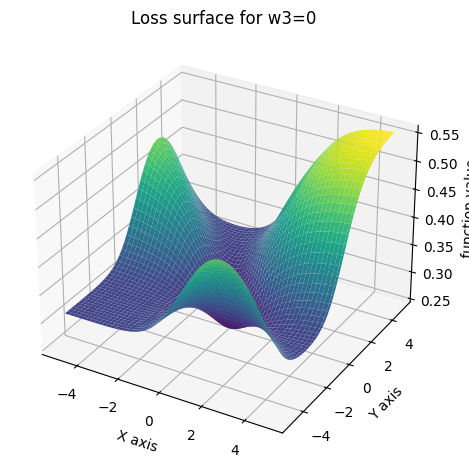

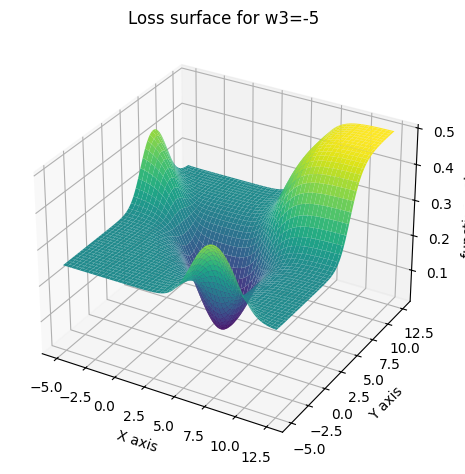

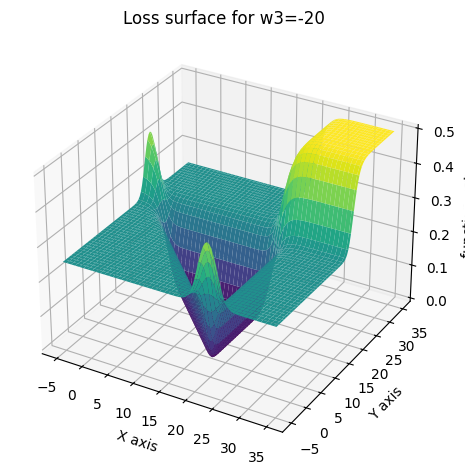

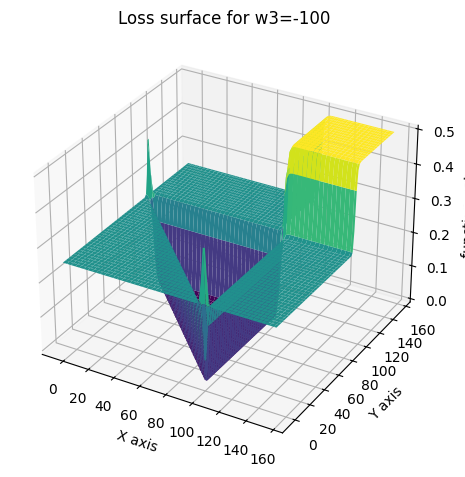

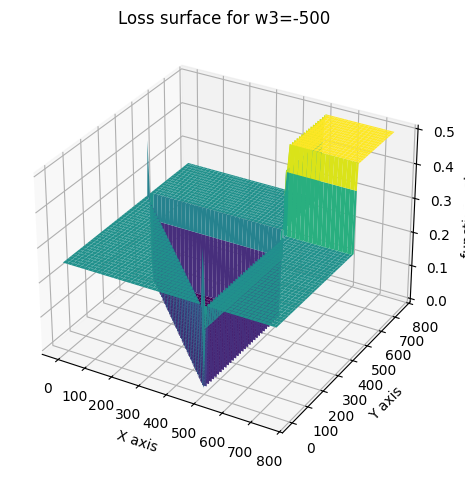

In [12]:
def loss(w1, w2, w3):
    weights = np.array([w1, w2, w3])
    z = np.dot(X, weights)
    error = Y - sigmoid(z)
    return np.mean(error ** 2) 

w3s = [0, -5, -20, -100, -500]
for w3 in w3s:
    plot_surface(lambda w1, w2: loss(w1, w2, w3), (-5, 1.5 * (-w3) + 5), (-5, 1.5 * (-w3) + 5), title=f'Loss surface for w3={w3}')